Finding Products with the Largest Decrease in Sales Between Two Periods (e.g., 2022 vs 2021) Scenario: The Sales Team would like to identify which products had the most significant decrease in sales between two periods (e.g., 2021 and 2022). Requirements: 1. Create two datasets for each period (e.g., 2021 and 2022), aggregated by product (sku_name). 2. Calculate the sales difference between the two periods. 3. Identify the products with the largest decrease in sales and show the top 10 products. 4. Create a bar chart to visualize the products with the largest decrease in sales. Key Features to Use: • sku_name (for product names) • order_date (for filtering by year) • qty_ordered (for sales data)

📉 Top 10 Products with Largest Sales Decrease (2022 vs 2021)
                                               sku_name  sales_2021  \
2952         shahi_buy one get one free Shahi Dal Moong       240.0   
1514                                      RS_Plain Rusk       160.0   
1470                      RB_Dettol Germ Busting Kit-bf       200.0   
1473                                RB_Household Bundle       133.0   
406                     CK_BF530-Underwear-Pack of 3-XL       119.0   
3154  vitamin_TVC-BB Cream (Buy 2 Get Kojic Facewash...        99.0   
1502                                   RS_Baklawa 500gm       107.0   
1508                           RS_Honey Dry Fruit Halwa        52.0   
98                                 Adolphs_TT-1-Black-S        50.0   
387                                      CA_shirt-Small        50.0   

      sales_2022  difference  
2952         0.0      -240.0  
1514         0.0      -160.0  
1470        50.0      -150.0  
1473         0.0      -133.0  
40

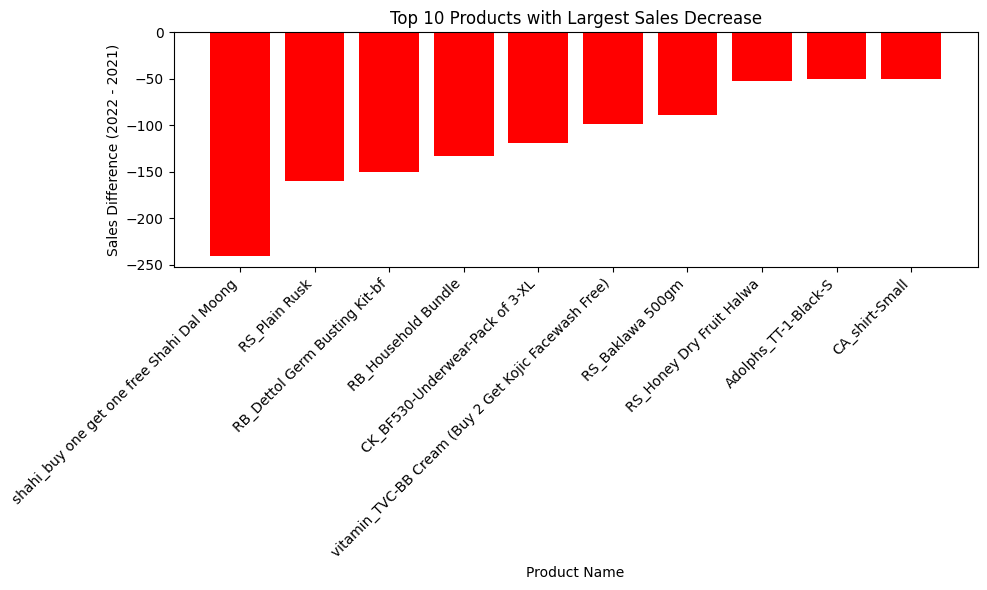

In [2]:
# 📌 Task 5: Finding Products with the Largest Decrease in Sales Between Two Periods (2021 vs 2022)

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure order_date is datetime & extract year
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year

# Step 3: Aggregate sales (qty_ordered) by product for 2021 and 2022
sales_2021 = (
    df[df['year'] == 2021]
    .groupby("sku_name", as_index=False)["qty_ordered"].sum()
    .rename(columns={"qty_ordered": "sales_2021"})
)

sales_2022 = (
    df[df['year'] == 2022]
    .groupby("sku_name", as_index=False)["qty_ordered"].sum()
    .rename(columns={"qty_ordered": "sales_2022"})
)

# Step 4: Merge datasets
merged_sales = pd.merge(sales_2021, sales_2022, on="sku_name", how="outer").fillna(0)

# Step 5: Calculate differences
merged_sales["difference"] = merged_sales["sales_2022"] - merged_sales["sales_2021"]

# Step 6: Sort and get top 10 products with largest decrease
top10_decrease = merged_sales.sort_values(by="difference").head(10)

# Step 7: Display Results
print("📉 Top 10 Products with Largest Sales Decrease (2022 vs 2021)")
print(top10_decrease[["sku_name", "sales_2021", "sales_2022", "difference"]])

# Step 8: Visualization (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(top10_decrease["sku_name"], top10_decrease["difference"], color="red")
plt.xlabel("Product Name")
plt.ylabel("Sales Difference (2022 - 2021)")
plt.title("Top 10 Products with Largest Sales Decrease")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
